In [1]:
from DataLoader import DataLoader
from Utility import *
/
dataloader = DataLoader("data")
dataloader.load_paths("paths_finished.tsv") 
dataloader.load_edges("links.tsv") 

In [2]:
posterior_probs = compute_posteriors(dataloader.transitions, dataloader.edges)

In [3]:
posteriors = posterior_probs[["Current_A","Next_A","Goal_G","P_star"]].groupby(["Current_A","Next_A","Goal_G"]).sum()

In [4]:
posteriors.sort_values(by="P_star")

P_star
Current_A                                          Next_A                    Goal_G                         
Wikipedia_Text_of_the_GNU_Free_Documentation_Li... Romeo_and_Juliet          Google                      0.0
                                                   The_Lorax                 GNU                         0.0
                                                   Consolation_of_Philosophy EastEnders                  0.0
                                                   Electron                  Athens                      0.0
                                                   Computer_programming      Open_source                 0.0
...                                                                                                      ...
Hello_Garci_scandal                                Philippines               Edward_V_of_England         1.0
                                                                             Computational_chemistry     1.0
                                                                             Buenos_Aires                1.0
                                                                             Badminton                   1.0
                                                                             Astronomy                   1.0

[196937 rows x 1 columns]

In [5]:
path_specific_distances = compute_path_specific_distances(dataloader.paths, posteriors, dataloader.pagerank)

Processing Paths: 100%|██████████| 51317/51317 [01:50<00:00, 463.00it/s]


In [8]:
path_specific_distances.sort_values(by="distance")

,start,goal,distance
12910,Bird,Wikipedia_Text_of_the_GNU_Free_Documentation_L...,-0.000000
218237,Microsoft_Windows,Windows_Vista,0.000847
54804,Microsoft_Windows,Windows_Vista,0.000847
218224,Microsoft_Windows,Windows_Vista,0.000847
265726,Microsoft_Windows,Windows_Vista,0.000847
...,...,...,...
43898,Employment,English_language,124.300461
43897,Corporation,English_language,124.488850
43896,Government,English_language,124.721624
43895,Washington%2C_D.C.,English_language,125.091820


In [9]:
dataloader.pagerank.loc["Asia"]

np.float64(0.0022547196147744753)

In [10]:
x = path_specific_distances[path_specific_distances["start"] == "Asia"]
y = x[x["goal"]=="Hello_Garci_scandal"]
y

,start,goal,distance
253303,Asia,Hello_Garci_scandal,0.282031
289880,Asia,Hello_Garci_scandal,0.282031


In [11]:
semantic_distances = path_specific_distances.groupby(["start", "goal"]).mean().reset_index()

In [12]:
# Save as a clean CSV file
semantic_distances.sort_values(by="distance").to_csv("semantics_distances.csv")

In [13]:
semantic_distances[semantic_distances["goal"] == "Noam_Chomsky"].sort_values(by="distance")

,start,goal,distance
77420,Linguistics,Noam_Chomsky,0.054946
31302,Communication,Noam_Chomsky,0.059755
75211,Language,Noam_Chomsky,0.156144
111103,Sanskrit,Noam_Chomsky,0.177273
115041,Socialism,Noam_Chomsky,0.182164
...,...,...,...
118136,Spain,Noam_Chomsky,3.482279
100263,Physics,Noam_Chomsky,3.641267
138480,Woodworking,Noam_Chomsky,3.662489
57177,Germany,Noam_Chomsky,4.355584


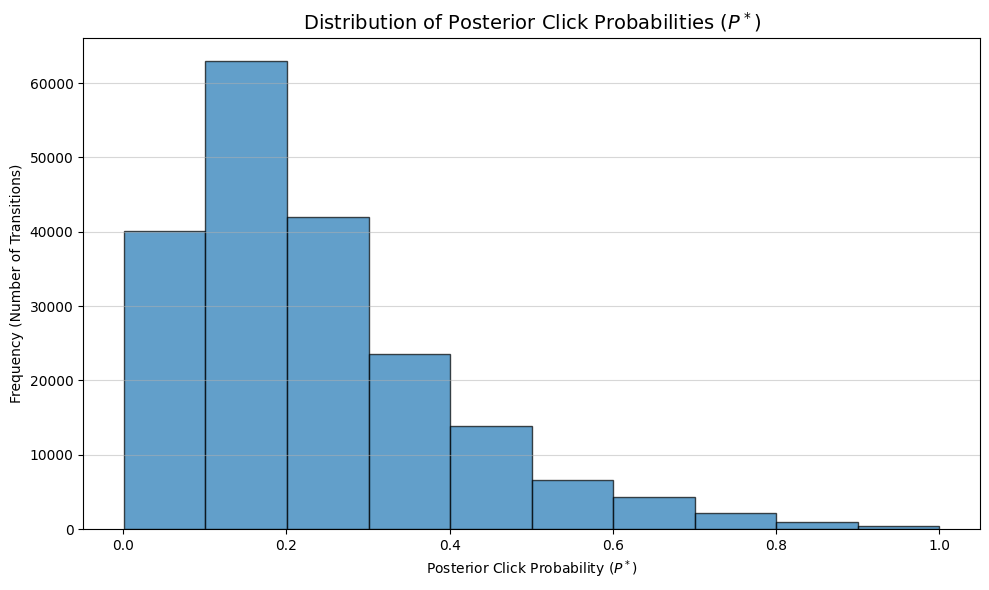

In [14]:
import matplotlib.pyplot as plt

# Filter out potential NaNs
p_star_data = posterior_probs['P_star'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(p_star_data, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Posterior Click Probabilities ($P^*$)', fontsize=14)
plt.xlabel('Posterior Click Probability ($P^*$)')
plt.ylabel('Frequency (Number of Transitions)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

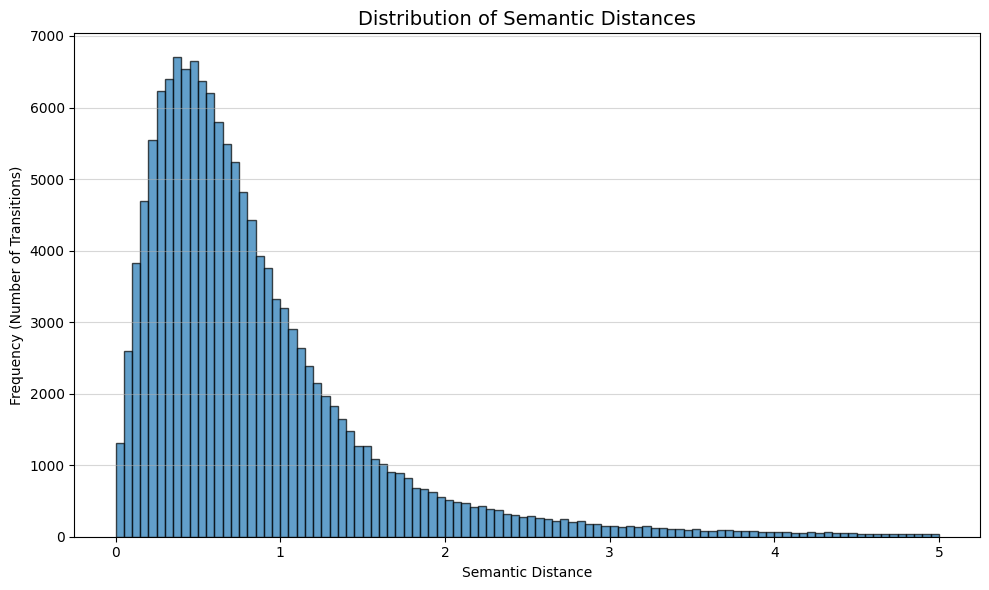

In [21]:
import matplotlib.pyplot as plt

# Filter out potential NaNs
x = semantic_distances[semantic_distances['distance'] < 5]
p_star_data = x['distance'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(p_star_data, bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Semantic Distances', fontsize=14)
plt.xlabel('Semantic Distance')
plt.ylabel('Frequency (Number of Transitions)')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()